In [1]:
import json
import os
from pycocotools.coco import COCO

In [2]:
image_info_json_file_path = './train.json'
with open(image_info_json_file_path, 'r') as f:
    df = json.load(f)

In [ ]:
df

### bbox 면적 분포 확인

In [ ]:
areas = []
for annotation in df['annotations']:
    bbox = annotation['bbox']
    width = bbox[2]
    height = bbox[3]
    area = width * height
    print(area)
    areas.append(area)

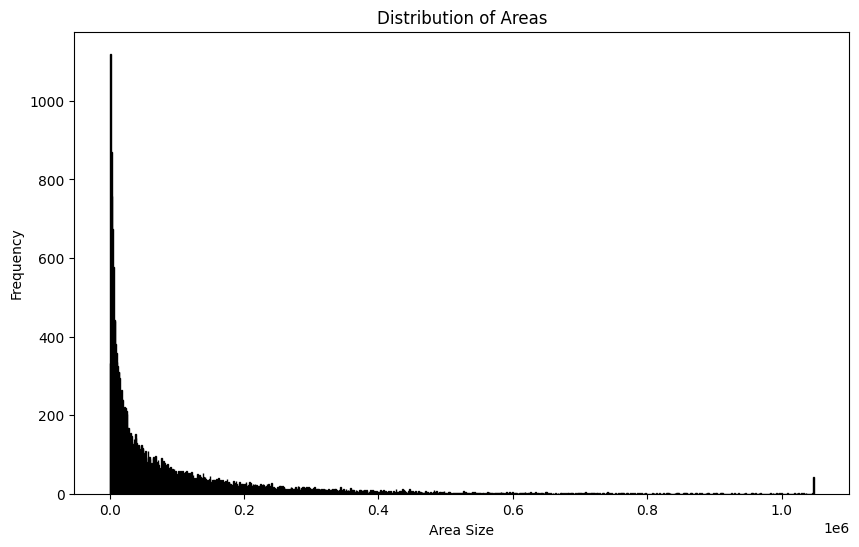

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(areas, bins=1000, edgecolor='black', color='orange')  # bins로 막대기 수 조절
plt.title("Distribution of Areas")
plt.xlabel("Area Size")
plt.ylabel("Frequency")
plt.show()

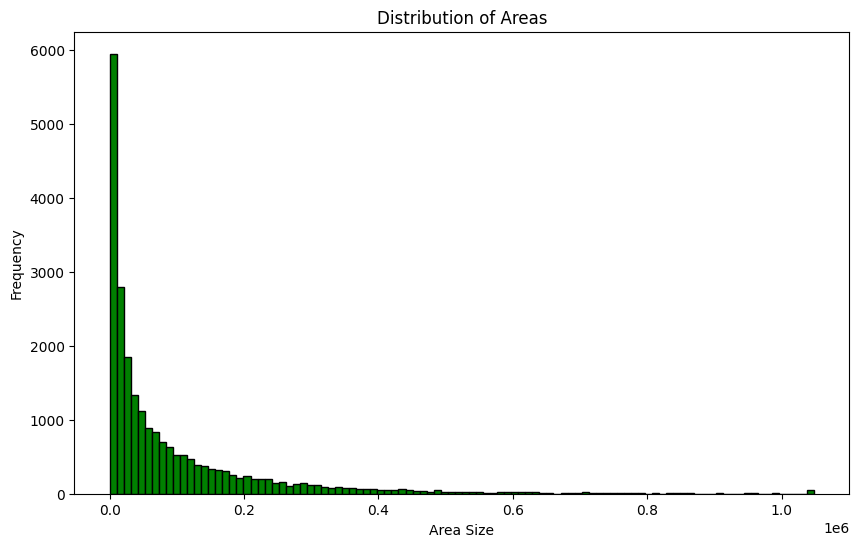

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(areas, bins=100, edgecolor='black', color='green')  # bins로 막대기 수 조절
plt.title("Distribution of Areas")
plt.xlabel("Area Size")
plt.ylabel("Frequency")
plt.show()

In [9]:
import numpy as np
areas_np = np.array(areas)
filtered_areas = areas_np[areas_np < 100000]
filtered_areas

array([10402.56, 26259.36, 69096.17, ..., 57309.72,  1772.74, 53008.67])

### 10만단위 이상은 자르고 봐보기

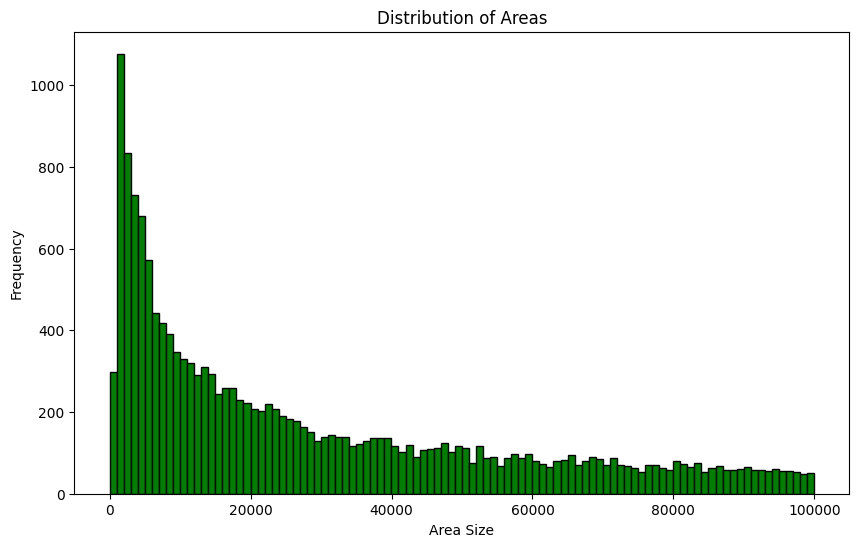

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(filtered_areas, bins=100, edgecolor='black', color='green')  # bins로 막대기 수 조절
plt.title("Distribution of Areas")
plt.xlabel("Area Size")
plt.ylabel("Frequency")
plt.show()

### small bbox, medium bbox 개수 확인

In [25]:
filtered_areas_32 = filtered_areas[filtered_areas < 32*32]
filtered_areas_96 = filtered_areas[filtered_areas < 96*96]
print(len(filtered_areas_32))
print(len(filtered_areas_96))

313
5507


### 이미지 개수 확인

In [31]:
image_bbox_dict = [{'image_id': annotation['image_id'], 'bbox': annotation['bbox']} for annotation in df['annotations']]

In [ ]:
image_bbox_dict

In [ ]:
image_area_dict = {}
for image in image_bbox_dict:
    width = image['bbox'][2]
    height = image['bbox'][3]
    area = width * height
    image_area_dict[image['image_id']] = area

print(image_area_dict)

In [ ]:
image_area_dict

In [43]:
areas_values = np.array(list(image_area_dict.values()))

filtered_areas_32 = areas_values[areas_values < 32*32]
filtered_areas_96 = areas_values[areas_values < 96*96]

print(len(filtered_areas_32))  
print(len(filtered_areas_96))  

43
722
